# Introducing the problem & the dataset: 


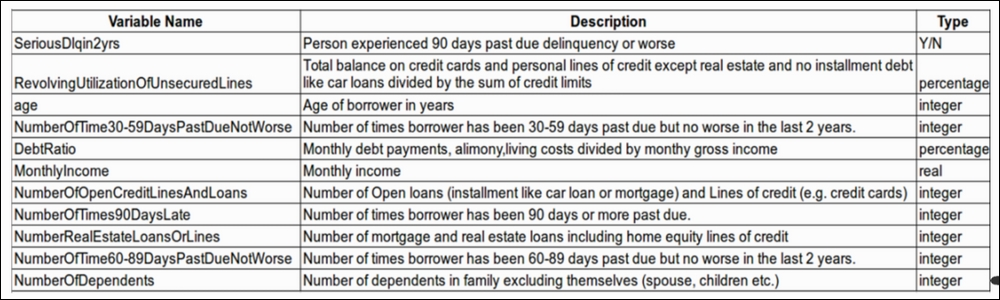






In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\1234567890\Desktop\python projects\cred risk modelling\credit-risk-modelling-master\data\cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
import re

df = df.drop(df.columns[[0]], axis=1) # drop the first unnamed column
df.columns = map(str.lower, df.columns) #lower case all columns

    
# Remove punctuation from all columns 
_col = []
for col in df.columns:
    col = re.sub(r'[^\w\s]','',col)
    _col.append(col)
    
df.columns = _col
df.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Some Exploratory Data Analysis (EDA): 

Devise strategies, explore a little, & take mental notes like how to replace null values, correlation, predictor class difference 93 vs 7 
,outlier identification

# Initial thoughts: 



In [56]:
df.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Missing Values

In [4]:
df.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

## Replacement Method for Missing Values

We will create 2 data sets: 1. Mean replaced 2. Median replaced

In [51]:
df_mean_replaced = df.fillna(df.mean())
df_mean_replaced.isnull().sum()


seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [52]:
df_median_replaced = df.fillna(df.median())
df_median_replaced.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

## Incorrect values or "outliers": 

Now that we have missing values out of the way we would like to check for incorrect entries or in more statistical terms outliers. Let's start by looking at mean and median for the entire set. 
 

In [53]:
df[df.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

## Something's fishy! 

As we can see the first variable 

In [6]:
df[df.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

### revolvingutilizationofunsecuredlines variable  exploration: 


__Definition__: Revolving utilization, also known as your “debt-to-limit ratio” or “credit utilization,” measures the amount of your revolving credit limits that you are currently using. Your revolving utilization is an important part of your credit score. 

__Example of individual utilization:__ 


Say I have a credit card with a 5,000  credit limit and a 1,000 balance. I divide 1,000 by 5,000 and get 0.2. I then multiply 0.2 by 100 to arrive at 20%. My individual revolving utilization is 20% for that account

As balance cannot be more than the credit card limit. You cannot take more money out than your credit limit at a given time. If you did then your revolving utilization would be 1. 

The normal range for this variable is between 0 and 1. Therefore we will start off by first replacing everthing in our revolvingutilizationofunsecuredlines Variable greater than 1 to be the max which is 0.99

In [57]:
revolving_new = []

for value in df.revolvingutilizationofunsecuredlines:
    if value > 0.99:
        revolving_new.append(0.99)
    else:
        revolving_new.append(value)
df.revolvingutilizationofunsecuredlines = revolving_new

In [63]:
max(df.revolvingutilizationofunsecuredlines)

0.99

## Age variable exploration: 

Let's look at the age variable. to quickly check if we have any outliers or not we will draw a box & whisker plot. We will also use collections Counter to check the count of each age year. 

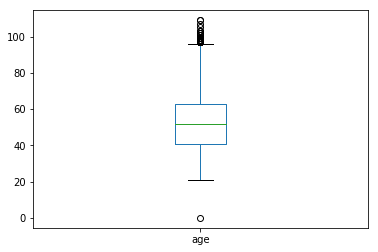

In [65]:
df.age.plot.box()

In [67]:
collections.Counter(df.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

From the above box plot & the collection counter it is evident that we have few "outliers". I will not replace the ones with age greater than 95 although these ages make a small percentage of the overall data we will keep them in the dataset for now. However we will replace age 0 with minimum age 

In [69]:
age_new = []

for value in df.age:
    if value < 21:
        age_new.append(21)
    else:
        age_new.append(value)
df.age = age_new

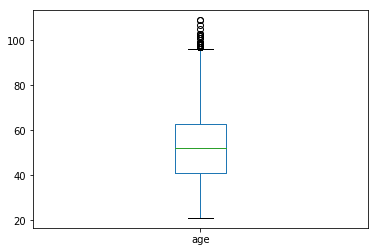

In [73]:
df.age.plot.box()

Text(0,0.5,'Total Count')

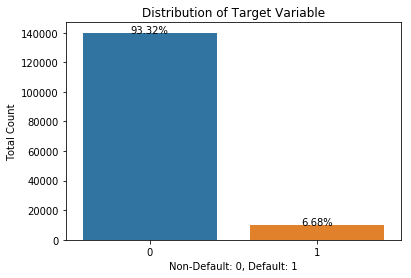

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

total = float(len(df))  

ax = sns.countplot(x="seriousdlqin2yrs", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
    
ax.set_title("Distribution of Target Variable")
ax.set_xlabel('Non-Default: 0, Default: 1')
ax.set_ylabel('Total Count')

## numberoftime3059dayspastduenotworse variable exploration: 


Same logic applies here. From the box plot we can see that the values 98 & 95 are out of what would be considered "normal range". We wouldn't want our results to be skewed so we would replace them with median values. 

_We will consider 95 & 98 as outliers_ 


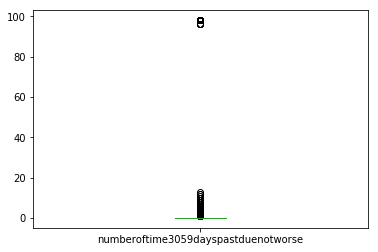

In [105]:
df.numberoftime3059dayspastduenotworse.plot.box()

In [82]:
collections.Counter(df.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [115]:
New = []
med = df.numberoftime3059dayspastduenotworse.median()
for val in df.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

df.numberoftime3059dayspastduenotworse = New

In [118]:
collections.Counter(df.numberoftime3059dayspastduenotworse)

Counter({2.0: 4598,
         0.0: 126287,
         1.0: 16033,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         7.0: 54,
         10.0: 4,
         6.0: 140,
         12.0: 2,
         8.0: 25,
         9.0: 12,
         13.0: 1,
         11.0: 1})

## debtratio variable exploration: 


In [ ]:
df.debtratio.plot.box()